In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import pi, e

# OBTENDO OS DADOS DOS PERÍODOS
Obtendo e processando 140 dados que são os períodos registrados em um pêndulo simples mantendo as suas variáveis (massa, comprimento e amplitude) constantes para observar a distribuição desses dados ao redor de uma média central

In [2]:
stringDados = r"""
    19,68 19,44 19,54 19,63 19,63 19,6 19,64 19,57 19,54 19,62 19,57 19,51 19,39 19,55 19,91 19,76 19,46
    19,72 19,76 19,79 19,55 19,62 19,85 19,69 19,69 19,73 19,65 19,66 19,7 19,64 19,76 19,65 19,65 19,66
    19,82 19,66 19,61 19,74 19,69 19,89 19,86 19,73 20,03 19,95 19,89 19,74 19,8 19,81 19,88 19,79 19,5
    19,7 19,81 19,64 19,72 19,75 19,65 19,69 19,62 19,52 19,68 19,6 19,84 19,49 19,68 19,74 19,54 19,76
    19,6 19,8 19,54 19,59 19,78 19,7 19,68 19,9 20,11 19,77 19,64 19,56 19,52 19,58 19,69 19,45 19,94 19,68
    19,45 19,63 19,6 19,7 19,62 19,58 19,7 19,78 19,78 19,72 19,56 19,65 19,64 19,23 19,56 19,73 19,58 19,78
    19,64 19,58 19,6 19,59 19,67 19,67 19,52 19,53 19,56 19,64 19,66 19,61 19,72 19,47 19,65 19,71 19,66 19,68
    19,77 19,72 19,38 19,55 19,65 19,73 19,64 19,72 19,6 19,67 19,5 19,84 19,56 19,76 19,56 19,71 19,77 19,76 
"""

In [3]:
def formatarDados(string=''):
    string = string.strip().replace('\n', ' ').replace(',', '.')
    string = ' '.join(string.split()) # SUBSTITUINDO OS ESPAÇOS POR APENAS 1
    string = string.split(' ')
    lista = []
    for c in range(0, len(string)):
        lista.append(float(string[c]))
    return lista

In [4]:
dados = formatarDados(stringDados)
print(dados)

[19.68, 19.44, 19.54, 19.63, 19.63, 19.6, 19.64, 19.57, 19.54, 19.62, 19.57, 19.51, 19.39, 19.55, 19.91, 19.76, 19.46, 19.72, 19.76, 19.79, 19.55, 19.62, 19.85, 19.69, 19.69, 19.73, 19.65, 19.66, 19.7, 19.64, 19.76, 19.65, 19.65, 19.66, 19.82, 19.66, 19.61, 19.74, 19.69, 19.89, 19.86, 19.73, 20.03, 19.95, 19.89, 19.74, 19.8, 19.81, 19.88, 19.79, 19.5, 19.7, 19.81, 19.64, 19.72, 19.75, 19.65, 19.69, 19.62, 19.52, 19.68, 19.6, 19.84, 19.49, 19.68, 19.74, 19.54, 19.76, 19.6, 19.8, 19.54, 19.59, 19.78, 19.7, 19.68, 19.9, 20.11, 19.77, 19.64, 19.56, 19.52, 19.58, 19.69, 19.45, 19.94, 19.68, 19.45, 19.63, 19.6, 19.7, 19.62, 19.58, 19.7, 19.78, 19.78, 19.72, 19.56, 19.65, 19.64, 19.23, 19.56, 19.73, 19.58, 19.78, 19.64, 19.58, 19.6, 19.59, 19.67, 19.67, 19.52, 19.53, 19.56, 19.64, 19.66, 19.61, 19.72, 19.47, 19.65, 19.71, 19.66, 19.68, 19.77, 19.72, 19.38, 19.55, 19.65, 19.73, 19.64, 19.72, 19.6, 19.67, 19.5, 19.84, 19.56, 19.76, 19.56, 19.71, 19.77, 19.76]


# HISTOGRAMA DOS DADOS
Vamos criar um gráfico de histograma para confirmar se a distribuição dos dados é normal (gaussiana), onde os valores se concentram em torno da média (maior probabilidade) e poderemos usar o desvio padrão amostral e incerteza da média

- Definindo os limites em que cada caixa do histograma vai englobar

In [5]:
def limites(lista, caixas):
    intervalo = []
    dx = (max(lista) - min(lista))/caixas
    soma = min(lista)
    
    intervalo.append(min(lista))
    while soma < max(lista):
        soma += dx
        intervalo.append(soma)
    intervalo.append(max(lista))
    
    return intervalo

- Definindo as funções para distribuição normal e a probabilidade de ocorrência de um valor entre $a$ e $b$

$G(x) = \frac{1}{\sqrt{2\pi\sigma}}\,e^{-\frac{(x - \mu)^2}{2\sigma^2}}\,\,\,\,\,\, e \,\,\,\,\,\,\,\,P(a \leq x \leq b) = \int^b_a \frac{1}{\sqrt{2\pi\sigma}}\,e^{-\frac{(x - \mu)^2}{2\sigma^2}}\,dx$

In [6]:
def probGaussiana(x, media, desvio):
    return (1) / (desvio * ((2*pi)**(0.5))) * (e ** (-1 * ((x - media)**2) / (2 * (desvio ** 2)) ))

def integral(a, b, media, desvio, n=10000):
    dx = (b - a) / n

    xDados = [a + dx * i for i in range(0, n)]
    yDados = [probGaussiana(x, media, desvio) for x in xDados]

    return (sum(yDados) * dx) # PORCENTAGEM

def yMax(desvio):
    return 1 / (desvio * (2 * pi)**0.5)

- Definindo funções básicas para média, desvio padrão e desvio amostral dos dados

In [7]:
def media(lista=[]):
    soma = 0
    for c in range(0, len(lista)):
        soma += lista[c]
    return soma/len(lista)

def desvioAmostral(lista=[]):
    soma = 0
    n = len(lista)
    vMedia = media(lista)

    for c in range(0, n):
        soma += (lista[c]-vMedia)**2

    return (soma/(n-1))**0.5

def desvioPadrao(lista=[]):
    soma = 0
    n = len(lista)
    vMedia = media(lista)

    for c in range(0, n):
        soma += (lista[c]-vMedia)**2

    return (soma/n)**0.5

In [8]:
G = probGaussiana(19.6, media(dados), desvioAmostral(dados))
print(f'A probabilidade de obtermos um período de exatamente 19.6 segundos é de: {G:.2f} %')

A = integral(18, 20, media(dados), desvioAmostral(dados)) * 100 # PORCENTAGEM
print(f'A probabilidade de obtermos um período entre 18 e 20 é: {A:.2f} %')

probMaxima = yMax(desvioAmostral(dados))
print(f'A maior probabilidade da média (maior chance de ocorrer) é: {probMaxima:.2f} % \n')

A probabilidade de obtermos um período de exatamente 19.6 segundos é de: 2.71 %
A probabilidade de obtermos um período entre 18 e 20 é: 99.53 %
A maior probabilidade da média (maior chance de ocorrer) é: 3.12 % 



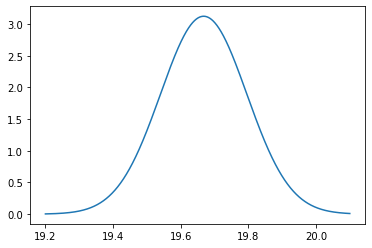

In [9]:
def graficoProbabilidade(a, b, media, desvio, n=10000):
    dx = (b - a) / n

    xDados = [a + dx * i for i in range(0, n)]
    yDados = [probGaussiana(x, media, desvio) for x in xDados]

    plt.plot(xDados, yDados)
    plt.show()

graficoProbabilidade(19.2, 20.1, media(dados), desvioAmostral(dados))

- Criando uma função que retorna duas listas com os eixos x e y dos valores da distribuição gaussiana entre $a$ e $b$

In [10]:
def invervalosProbabilidade(dados, a, b, media, desvio, n=10000):
    dx = (b - a) / n

    xDados = [a + dx * i for i in range(0, n)]
    yDados = [probGaussiana(x, media, desvio) for x in xDados]
    
    yDados = [y * 35/3 for y in yDados]
    return xDados, yDados

In [11]:
xDados, yDados = invervalosProbabilidade(dados, 19.2, 20.1, media(dados), desvioAmostral(dados))

Vemos que a distribuição dos dados é aproximadamente normal (em comparação com a gaussiana) pelo gráfico abaixo, o que significa que podemos usar métodos de desvio padrão pois os valores se concentram ao redor da média

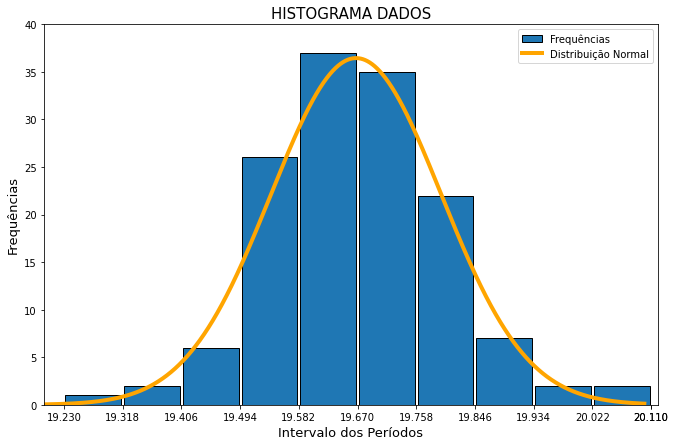

In [12]:
caixas = 10
intervaloX = limites(dados, caixas)
plt.figure(figsize=(11,7))
plt.hist(dados, bins=caixas, edgecolor='black', rwidth=0.95, label='Frequências')
plt.title('HISTOGRAMA DADOS', fontsize=15)
plt.xlabel('Intervalo dos Períodos', fontsize=13)
plt.ylabel('Frequências', fontsize=13)
plt.xticks(intervaloX)

plt.axis([19.2, 20.12, 0, 40])

plt.plot(xDados, yDados, label='Distribuição Normal', linewidth=4, color='orange')
plt.legend()

plt.savefig(r'C:\Users\march\OneDrive\Documentos\Imagens Latex\squares_plot.png', bbox_inches='tight')
plt.show()

# INCERTEZA DA MÉDIA
- Gerando uma lista de dados aleatórios e únicos presente nos dados para maior precisão da incerteza da média

In [13]:
def dadosAleatorios(lista, qtdMax):
    n = len(lista)
    posicoesAleatorias = []

    i = 0
    while True:
        x = random.randint(0, n-1)

        if x not in posicoesAleatorias:
            posicoesAleatorias.append(x)

        if i == qtdMax:
            break

        i += 1
    
    return [lista[c] for c in posicoesAleatorias]

- Usando a tabela T-Student para encontrar a incerteza da média de um conjunto de valores distibuídos normalmente (suas frequências se concentram em torno da média)

In [14]:
def incertezaMedia(lista):
    n = len(lista)
    tStudent = [
        1, 12.706, 4.303, 3.182, 2.776, 2.571, 2.447, 2.265, 2.306, 2.262, 2.228, 2.201, 2.179,
        2.160, 2.145, 2.131, 2.120, 2.110, 2.101, 2.093, 2.086, 2.080, 2.074, 2.069, 2.064,
        2.060, 2.056, 2.052, 2.048, 2.045, 2.042
    ]

    if n <= 30:
        return tStudent[n-1] * desvioAmostral(lista)/(n**0.5)
    
    return desvioAmostral(lista)/(n**0.5)

- Podemos ver no código abaixo que a média e a incerteza da média não variam tanto e está ao redor de um valor único de 19.6 segundos

In [15]:
for n in range(5, 140, 20):
    listaAleatoria = dadosAleatorios(dados, n)
    print(f'A MÉDIA DE {n} VALORES DA LISTA É: {media(listaAleatoria):.2f} += {incertezaMedia(listaAleatoria):.2f}')

A MÉDIA DE 5 VALORES DA LISTA É: 19.67 += 0.08
A MÉDIA DE 25 VALORES DA LISTA É: 19.66 += 0.03
A MÉDIA DE 45 VALORES DA LISTA É: 19.66 += 0.02
A MÉDIA DE 65 VALORES DA LISTA É: 19.65 += 0.02
A MÉDIA DE 85 VALORES DA LISTA É: 19.67 += 0.02
A MÉDIA DE 105 VALORES DA LISTA É: 19.67 += 0.02
A MÉDIA DE 125 VALORES DA LISTA É: 19.65 += 0.01


# GRÁFICO LINEAR DA MÉDIA DOS PERÍODOS
O objetivo deste trabalho é realizar o experimento do pêndulo simples e captar os dados
do período em cada um, para assim determinar quais são os fatores que determinam o
que alteram o período de um pêndulo simples.

Para diminuir o erro no período do pêndulo, devemos fazer com que no mesmo expe
rimento, haja uma captação de dados contínua, ou seja, soltar o pêndulo uma só vez
e deixar ele realizar 3 oscilações seguidas, para assim dividir esse tempo por 3, dessa
forma, o erro fica distribuído entre as medidas e o delay de reação do ser humano é dimi
nuído. Quanto maior for essa divisão, menor o erro no período. Para diminuir ainda mais
esse erro de reação, a cronometragem do tempo será feita através de um aplicativo de
forma muito mais precisa e eficiente.

Em cada mudança de variável para calcular o período de oscilação, serão efetuados 5
experimentos, T (1º), T (2º), T (3º), T (4º) e T (5º), para assim tirar uma média dos três T
(média) que será exibida nas tabelas. Escolhemos realizar 5 experimentos pois na tabela
de 140 dados do pêndulo fica clara que a diferença entre 5 e 50 dados é praticamente
desprezível na incerteza da média.

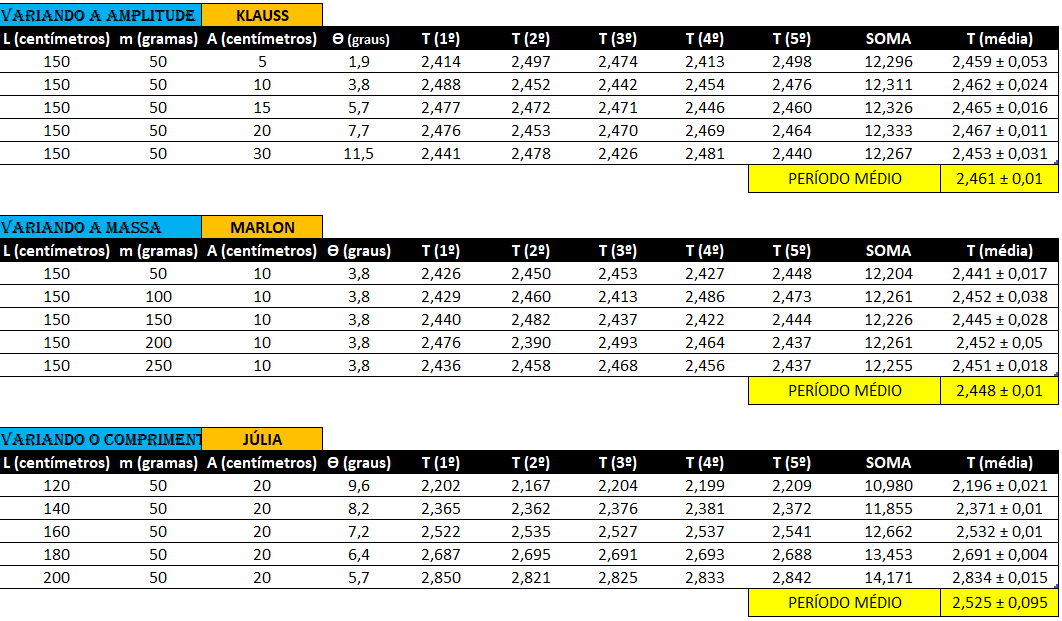

- Criando um gráfico usando 3 listas de 5 valores que são a média dos períodos de cada variação (massa, comprimento e amplitude)

In [16]:
MASSA       = [2.459, 2.462, 2.465, 2.467, 2.453]
AMPLITUDE   = [2.441, 2.452, 2.445, 2.452, 2.451]
COMPRIMENTO = [2.196, 2.371, 2.532, 2.691, 2.834]

x = [c for c in range(1, len(MASSA) + 1)]

###  Eliminando OUTLIERS

In [17]:
def isOutlier(dados, x):
    tabela = [0, 0, 0, 1.38, 1.54, 1.65, 1.73, 1.80, 1.85, 1.91, 1.96, 1.99, 2.03, 2.06,
              2.1, 2.13, 2.16, 2.18, 2.20, 2.22, 2.24, 2.26, 2.28, 2.30, 2.31, 2.33,
              2.35, 2.36, 2.37, 2.38, 2.39]
    
    n = len(dados)
    r = abs(media(dados) - x)/desvioPadrao(dados)
    R = tabela[n]
    
    if r > R:
        return True
    
    return False

def allOutliers(dados):
    outliers = []
    for x in dados:
        if isOutlier(dados, x):
            outliers.append(x)

    return outliers

def removeValues(dados, lista):
    for x in lista:
        for y in range(dados.count(x)):
            dados.remove(x)
        
    return dados

In [18]:
MASSA       = removeValues(MASSA, allOutliers(MASSA))
AMPLITUDE   = removeValues(AMPLITUDE, allOutliers(AMPLITUDE))
COMPRIMENTO = removeValues(COMPRIMENTO, allOutliers(COMPRIMENTO))

print(MASSA)
print(AMPLITUDE)
print(COMPRIMENTO)

desvioPadrao(AMPLITUDE)

[2.459, 2.462, 2.465, 2.467]
[2.441, 2.452, 2.445, 2.452, 2.451]
[2.196, 2.371, 2.532, 2.691, 2.834]


0.004445222154178643

Vemos que um outlier foi encontrado em "massa", agora o tamanho da lista está em 4, para consertar a lista para voltar para o tamanho original (para plotar o gráfico), vamos adicionar a média desses dados

In [19]:
MASSA.append(media(MASSA))
MASSA

[2.459, 2.462, 2.465, 2.467, 2.46325]

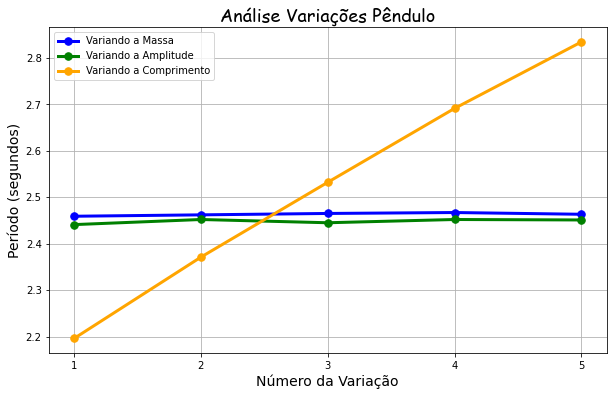

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(x, MASSA, label='Variando a Massa', linewidth=3, color='blue', marker='.', markersize=15)
plt.plot(x, AMPLITUDE, label='Variando a Amplitude', linewidth=3, color='green', marker='.', markersize=15)
plt.plot(x, COMPRIMENTO, label='Variando a Comprimento', linewidth=3, color='orange', marker='.', markersize=15)

plt.title('Análise Variações Pêndulo', fontsize=18, fontname='Comic Sans MS')
plt.xlabel('Número da Variação', fontsize=14)
plt.ylabel('Período (segundos)', fontsize=14)

plt.xticks([c for c in range(1, len(MASSA) + 1)])
plt.legend(loc="upper left")
plt.grid()

plt.show()

# TABELA ANOVA
Utilizando a tabela ANOVA e seus métodos matemáticos, poderemos comprovar qual é a variável que realmente gera uma variação no período do pêndulo

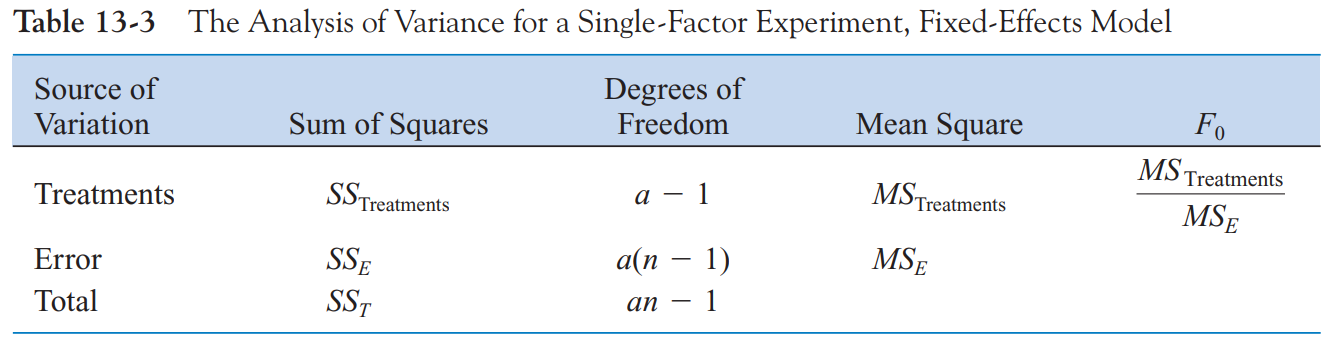

In [22]:
AMPLITUDE = [
    [2.414, 2.497, 2.474, 2.413, 2.498],
    [2.488, 2.452, 2.442, 2.454, 2.476],
    [2.477, 2.472, 2.471, 2.446, 2.460],
    [2.476, 2.453, 2.470, 2.469, 2.464],
    [2.441, 2.478, 2.426, 2.481, 2.440]
]

MASSA = [
    [2.426, 2.450, 2.453, 2.427, 2.448],
    [2.429, 2.460, 2.413, 2.486, 2.473],
    [2.440, 2.482, 2.437, 2.422, 2.444],
    [2.476, 2.390, 2.493, 2.464, 2.437],
    [2.436, 2.458, 2.468, 2.456, 2.437]
]

COMPRIMENTO = [
    [2.202, 2.167, 2.204, 2.199, 2.209],
    [2.365, 2.362, 2.376, 2.381, 2.372],
    [2.522, 2.535, 2.527, 2.537, 2.541],
    [2.687, 2.695, 2.691, 2.693, 2.688],
    [2.850, 2.821, 2.825, 2.833, 2.842]
]

In [23]:
def somaQuadrados(matriz):
    soma = 0
    
    if type(matriz[0]) != list:
        for val in matriz:
            soma += val**2
        return soma
    
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            soma += matriz[i][j]**2
    
    return soma

def soma(matriz):
    soma = 0
    
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            soma += matriz[i][j]
    
    return soma

def somasIndividuais(matriz):
    somaLista = []
    for i in range(len(matriz)):
        soma = sum(matriz[i])
        somaLista.append(soma)
    
    return somaLista   

def encontrarVariacao(matriz):
    a = len(matriz)
    n = len(matriz[0])
    
    TAM = a * n # TODOS OS DADOS
    somaLista = somasIndividuais(matriz)
    
    tratamentos = somaQuadrados(somaLista)/n - soma(matriz)**2/TAM
    total = somaQuadrados(matriz) - soma(matriz)**2/TAM
    
    erro = abs(total-tratamentos)
    
    MStratamentos = tratamentos/(a - 1)
    MStotal = erro/(n*(a-1))
    
    F0 = MStratamentos/MStotal
    return F0

In [24]:
encontrarVariacao(AMPLITUDE)

0.23177890640196952

In [25]:
encontrarVariacao(MASSA)

0.18919077346214197

In [26]:
encontrarVariacao(COMPRIMENTO)

2875.3035552666224

Analisando a tabela ANOVA para os valores limites com uma confiança de 95% de $F_0 = f(0.05, a-1, a(n-1)) = f(0.05, 4, 20) = 2.87$, vemos que os valores de $F0$ para a variação na massa e amplitude são bem menores que 2.87, indicando que eles não geram variação no período final do pêndulo. Em contrapartida, a variação no comprimento gera $F0=2875$ que é muuuuuito maior do que o limite máximo estabelecido 2.87, isso mostra que a variação no comprimento gera uma grande interferência no período do pêndulo